# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from classifiers.perceptron import Perceptron
from classifiers.adaline import AdalineGD

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

In [2]:
wine = pd.read_csv(r'assets\wine.csv') # load the dataset

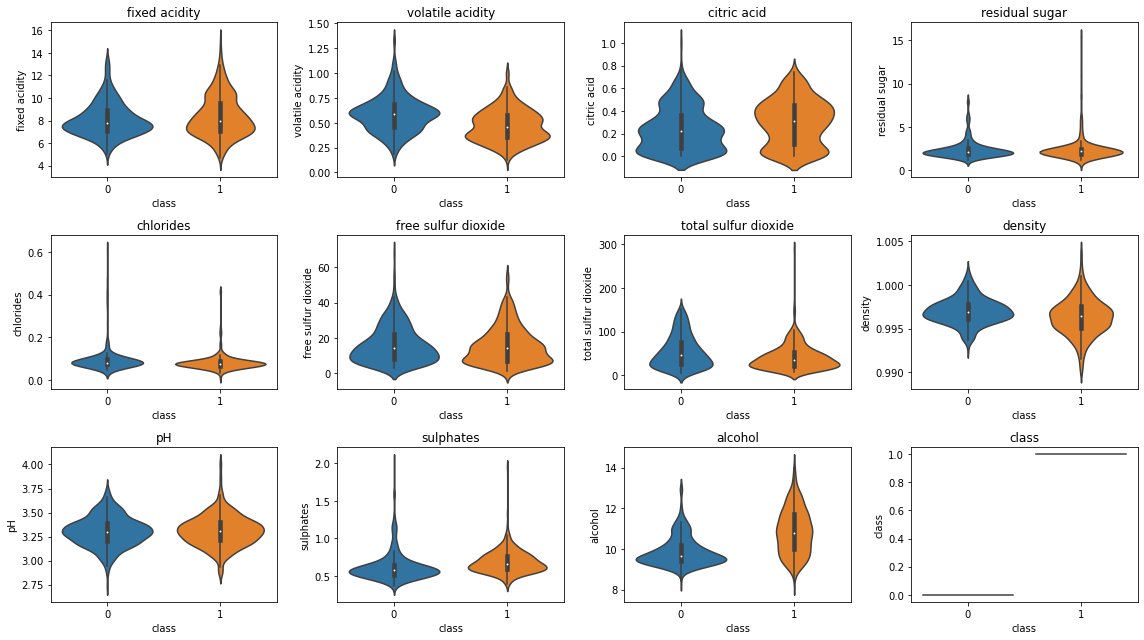

In [3]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 9)) # Create a 3x4 subplot
features = wine.columns
idx = 0 # Counter to ensure so we can iterate through every feature

# For loops to iterate over the subplot and insert a violinplot of a feature between the two classes
for row in range(3):
    for col in range(4):
        sns.violinplot(ax=ax[row, col], data=wine, x='class', y=features[idx])
        ax[row, col].set_title(features[idx])
        idx += 1
fig.tight_layout()
plt.show()


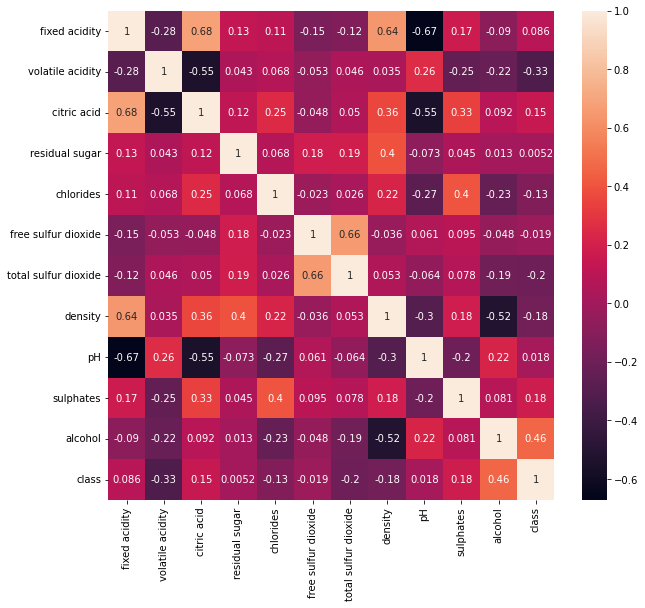

In [4]:
correlation_matrix = wine.corr() # creates the correlation matrix for the features.

heatmap, ax_heatmap = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True) # creates the heatmap
plt.show()

From the violinplot we can see that for the different features, the two classes of wine have some similairities and differences in their density plots. Many of the features have similair density plots between the two classes which may make it difficult to linearly sepereate the classes from each other as the values within the feautres are alike. In the heatmap we can see that the feature *alcohol* is highly correlated to the class variable.

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [5]:
# Change the class labels to suit the Perceptron and Adaline class
wine['class'] = np.where(wine['class'] == 0, -1, 1) 

# Split the dataset into two, a training and a test set
training = wine.iloc[:400, :-1][:]
test_set = wine.iloc[400:, :-1][:]

# Scale the training and testing data
training_scaled = (training - np.mean(training, axis=0)) / np.std(training, axis=0, ddof=1) 
test_set_scaled = (test_set - np.mean(training, axis=0)) / np.std(training, axis=0, ddof=1)

# Split into training and test target values
training_target = wine['class'][:400].values
test_target = wine['class'][400:].values


__Training:__

In [6]:
# Initialize the number of data and epochs and learning rate
subsets = [50 * x for x in range(1, 9)]
epochs = 50
eta = 0.0001

#### Perceptron

In [7]:
# Initalize a numpy array which will serve as our heatmap for the perceptron algorithm
heat_percep = np.zeros((len(subsets), epochs))

# For loop iterating through the indicies for the column of the heatmap and number of data each model is taking
for i, subset in enumerate(subsets, 0):
    # For loop iterating through number of epochs each model is going to run
    for epoch in range(1, epochs + 1):
        percep = Perceptron(eta=eta, n_iter=epoch, random_state=1) # initialize new perceptron model
        percep.fit(training_scaled.values[:subset], training_target[:subset]) # fit a subset of the scaled data into the model
        percep_predict = percep.predict(test_set_scaled) # the model will try to predict the correct class label
        heat_percep[i, epoch - 1] = (np.sum(percep_predict == test_target) / test_target.shape[0]) # calculate the prediction accuracy and add it to the heatmap


#### Adaline

In [8]:
# Initalize a numpy array which will serve as our heatmap for the adaline algorithm
heat_ada = np.zeros((len(subsets), epochs))

# for loop iterating through the indicies for the column of the heatmap and number of data each model is taking
for i, subset in enumerate(subsets, 0):
    # For loop iterating through number of epochs each model is going to run
    for epoch in range(1, epochs + 1):
        ada = AdalineGD(eta=eta, n_iter=epoch, random_state=1)  # initialize new adaline model
        ada.fit(training_scaled[:subset], training_target[:subset]) # fit a subset of the scaled data into the model
        ada_predict = ada.predict(test_set_scaled) # the model will try to predict the correct class label
        heat_ada[i, epoch - 1] = (np.sum(ada_predict == test_target) / test_target.shape[0]) # calculate the prediction accuracy and add it to the heatmap

## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn (Lenker til en ekstern side.). See below what the heatmaps should look like for the two classification algorithms.

In [9]:
# Create x- and y-labels for the heatmap plots
x_label = [f"{epoch} epochs" for epoch in range(1, 51)]
y_label = [f"{subset * 50} out of 400" for subset in range(1, 9)]

##### Heat map results computed with the perceptron model

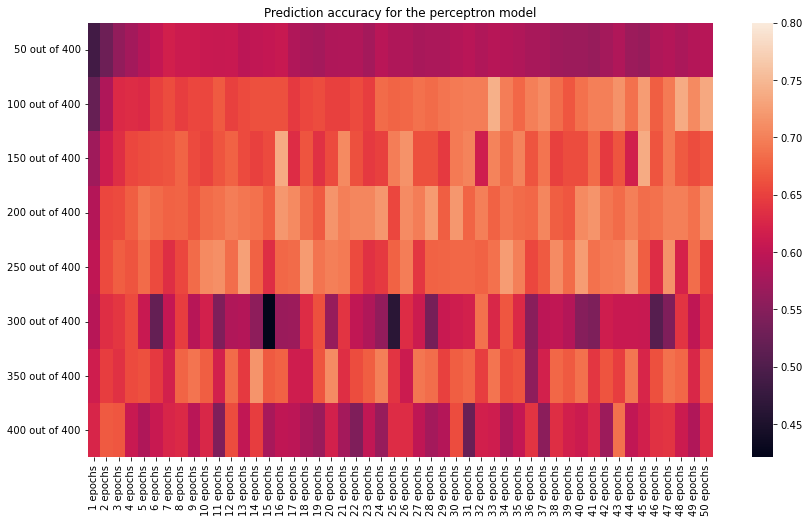

In [10]:
# Plot the heatmap for the perceptron model
plt.subplots(figsize=(14, 8))
sns.heatmap(heat_percep, xticklabels=x_label, yticklabels=y_label, vmax=0.8)
plt.title('Prediction accuracy for the perceptron model')
plt.show()

##### Heat map for results computed with the adaline model

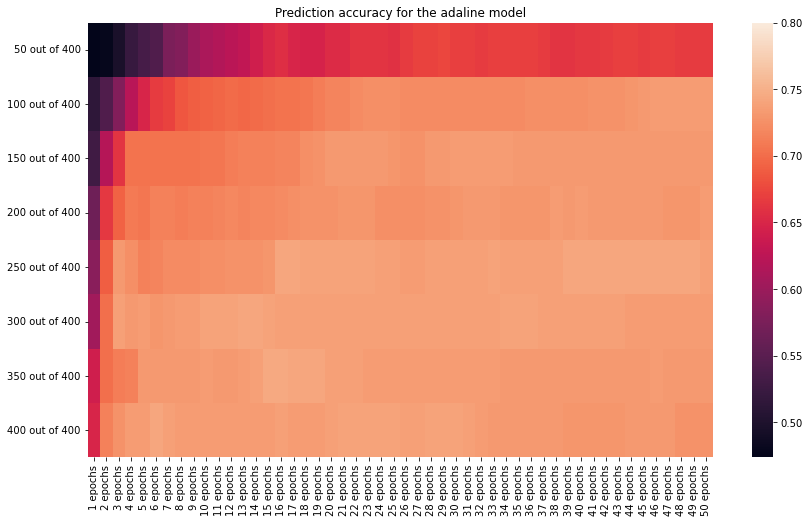

In [11]:
# Plot the heatmap for the adaline model
plt.subplots(figsize=(14, 8))
sns.heatmap(heat_ada, xticklabels=x_label, yticklabels=y_label, vmax=0.8)
plt.title('Prediction accuracy for the adaline model')
plt.show()

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [12]:
# Find the highest prediciton accuracy for the two models by finding the max value of each array.
max_ada = heat_ada.max()
max_percep = heat_percep.max()

# Print out the value of the highest prediction accuracies alongside number of occurences.
print(f"The highest prediction accuracy with the perceptron model is {max_percep*100:.3f} % with {(max_percep == heat_percep).sum()} occurrence(s).")
print(f"The highest prediction accuracy with the adaline model is {max_ada*100:.3f} % with {(max_ada == heat_ada).sum()} occurrence(s).")

# We can locate max_ada and max_percep by using np.where which returns the indicies of the max values. We then unpack it by using the * 
# operator such that we only return the tuple, which we in turn make a list to unpack the tuple from the zip-object.
max_ada_where = list(zip(*np.where(heat_ada == max_ada)))
max_percep_where = list(zip(*np.where(heat_percep == max_percep)))
print(max_ada_where)
print(max_percep_where)

The highest prediction accuracy with the perceptron model is 74.185 % with 1 occurrence(s).
The highest prediction accuracy with the adaline model is 74.436 % with 2 occurrence(s).
[(6, 14), (6, 15)]
[(1, 32)]


The most accurate predictions from our adaline model occurs at 350 samples while training with both 15 and 16 epochs. Meanwhile, the most accurate predictions for the perceptron model occurs at 100 samples while training for 33 epochs.

## Discussion

The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?

__Insert your answer below__

=====================

The feature weights in the perceptron model is updated for each row of data. In comparison, the adaline model updates its weights by looking at the entire column of the feature itself. For each perceptron model we train we have to go through an incerasing number of data. And, for each increase in number of input data the model have to run through an increasing number of epochs as well. Having to go through each sample to compute the updated weights results in the longer run time for the perceptron algorithm compared to the adaline algorithm.

---